In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from itertools import product

import plotly as ply
from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff
import plotly.graph_objs as go

init_notebook_mode(connected=True) 
np.set_printoptions(linewidth=160)

In [2]:
df_crimes = pd.read_csv("Crimes/table_4_crime_in_the_united_states_by_region_geographic_division_and_state_2014-2015.csv")
df_ganja  = pd.read_csv("marijuana-street-price-clean.csv")
df_legal2 = pd.read_csv('legal2.csv')

df_ganja['date_processed'] = df_ganja.date.apply(lambda x : dt.strptime(x, '%Y-%m-%d').date())
df_ganja = df_ganja.sort_values('date')

def _datecleaner(s):
    if s is np.nan:
        return s
    ls = s.split('-')
    if len(ls) == 2:
        ls.append(15)
    li = list(map(int,ls))
    return dt(year = li[0], month = li[1], day = li[2]).date()

df_legal2.year_signed   = list(map(_datecleaner, df_legal2.year_signed  ))
df_legal2.year_enforced = list(map(_datecleaner, df_legal2.year_enforced))

In [3]:
# df_legal = pd.read_csv('legal.csv')

# df_legal = df_legal[df_legal.year.isin(['2014', 'mid-2014', '2015'])]
# df_legal = df_legal[df_legal.state.isin(states)]
# df_legal.index = range(len(df_legal))

In [4]:
df_legal2.head()

,year_signed,year_enforced,state,law
0,2014-03-15,NaN,Utah,Medicinal
1,2014-04-15,2014-10-01,Maryland,Medicinal
2,2014-03-15,2014-07-15,Missouri,Medicinal
3,2014-05-15,2015-06-01,Minnesota,Medicinal
4,2014-07-15,NaN,New York,Medicinal


In [5]:
states = ['California', 'Florida', 'New York', 'Utah', 'Alabama', 'Maryland', 'Alaska', 'Oregon', 'Missouri',
          'Minnesota', 'Mississippi', 'Iowa', 'Louisiana', 'North Carolina', 'South Carolina']

In [6]:
set(states).symmetric_difference(set(df_legal2.state))

{'California'}

In [7]:
limits = {qual+'_'+lim: limfunc(df_ganja[qual]) for qual,(lim,limfunc) in product(['HighQ', 'MedQ'], ( ('Min',min),('Max',max) ))}

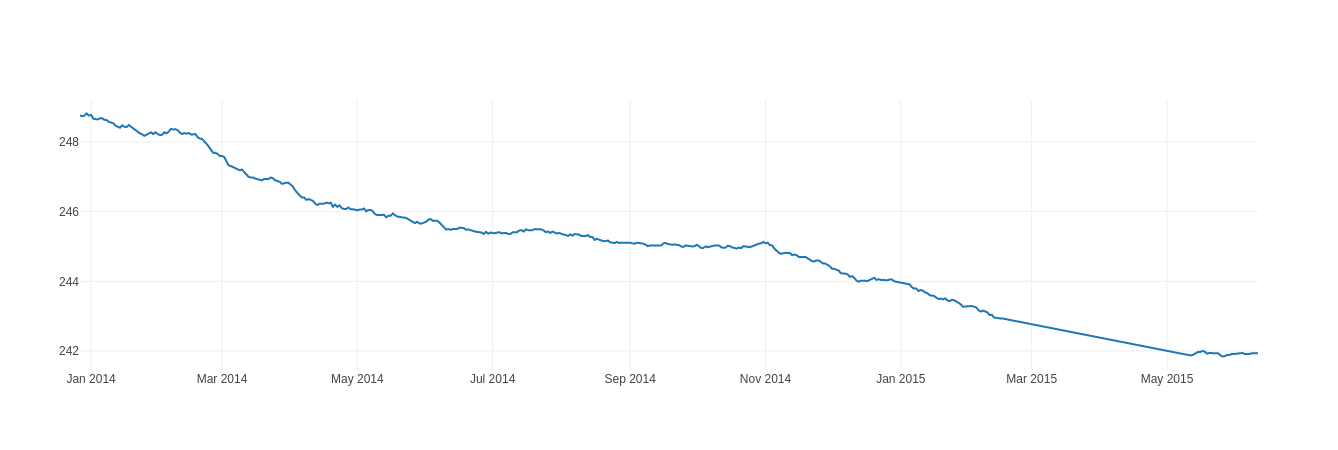

In [8]:
_part = df_ganja[df_ganja.State == 'California']
ply.offline.iplot(go.Figure([go.Scatter(x = _part.date_processed, y = _part.HighQ)]), validate=False)

In [9]:
rows = 3; cols = 5
fig = ply.tools.make_subplots(rows, cols , subplot_titles = states)
st2coords = dict()

for st,(row,col) in zip(states, product(range(rows),range(cols))):
    st2coords[st] = (row+1, col+1, row*5+col+1)                 # construct mapping
    _part = df_ganja[df_ganja.State == st].sort_values('date')  # select state
    fig.append_trace(go.Scatter(
        x = _part.date_processed,
        y = _part.HighQ,
        name = st,
        marker = {'color': 'blue'}
    ), row = row+1, col = col+1 )
#     fig.append_trace(go.Scatter(
#         x = _part.date.apply(lambda x : dt.strptime(x, '%Y-%m-%d').date()),
#         y = _part.MedQ,
#         marker = {'color': 'green'}
#     ), row = row+1, col = col+1 )

fig.layout.showlegend = False
# for k in fig.layout:
#     if k[:5] == 'yaxis':
#         fig.layout[k]['range'] = [limits['HighQ_Min'], limits['HighQ_Max']]

def _vline_formatter(year, state, law):
    if year is np.nan:
        return None
    ordinal = str(st2coords[state][2])
    return {
        'type': 'line',
        'line': {
    #         'dash': 'dot',
            'color': {'Medicinal': '#ff5555', 'Recreational': '#55ff55'}[law],
            'width': 2
        },
        'x0': year,
        'x1': year,
        'y0': df_ganja.HighQ[df_ganja.State == state].min(),
        'y1': df_ganja.HighQ[df_ganja.State == state].max(),
        'xref': 'x' + ordinal,
        'yref': 'y' + ordinal,
    }

shapes = [ _vline_formatter(r.year_signed,   r.state, r.law) for _,r in df_legal2.iterrows() ] + \
         [ _vline_formatter(r.year_enforced, r.state, r.law) for _,r in df_legal2.iterrows() ]
fig.layout.shapes = [d for d in shapes if d is not None]

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]
[ (3,1) x11,y11 ]  [ (3,2) x12,y12 ]  [ (3,3) x13,y13 ]  [ (3,4) x14,y14 ]  [ (3,5) x15,y15 ]



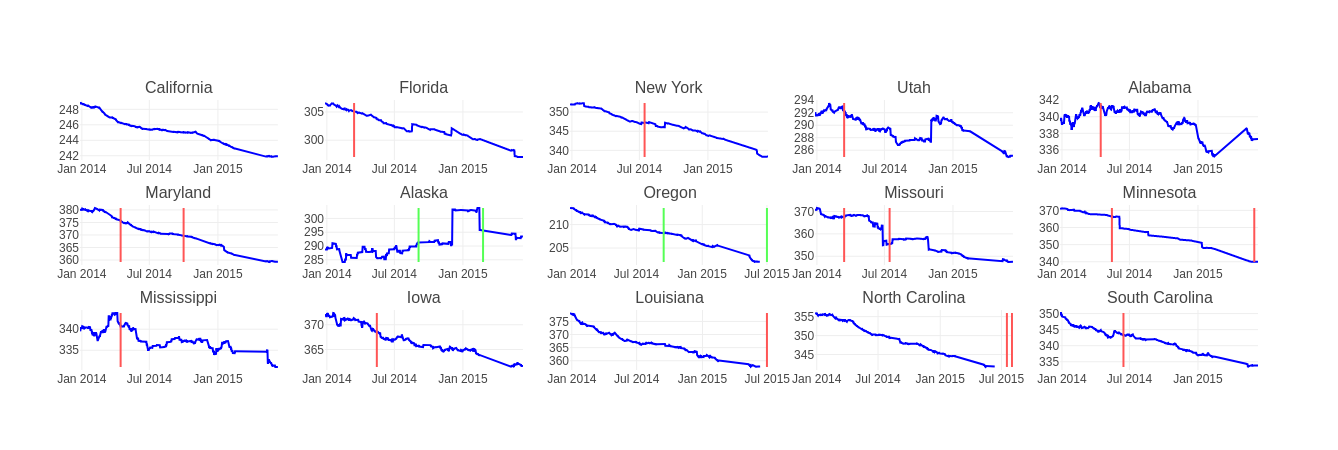

In [10]:
ply.offline.iplot(fig, validate=False)

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>